#### Teszteléshez a tanításra is szükség van (modell generálása miatt)
#### Az adatok a következő linken megtalálhatóak:
#### https://drive.google.com/drive/folders/1Z2AodbzXnjAlEHZl3rz1yyeG40soJK55?usp=sharing

In [3]:
# Segédfüggvények

import numpy as np
import datetime

def accuracy(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

def precision(y_true, y_pred, normalize=True, sample_weight=None):
    pre_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_prec = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_prec = 1
            pre_list.append(tmp_prec)
        elif len(set_pred) > 0:
            tmp_prec = len(set_true.intersection(set_pred))/\
                    float(len(set_pred))
            pre_list.append(tmp_prec)
        else:
            None
    return np.mean(pre_list)

def recall(y_true, y_pred, normalize=True, sample_weight=None):
    rec_list = []
    for i in range(y_true.shape[0]):
        set_true = set(np.where(y_true[i])[0])
        set_pred = set(np.where(y_pred[i])[0])
        tmp_rec = None
        if len(set_true) == 0:
            tmp_rec = 0.0
        elif len(set_pred) == 0:
            tmp_rec = 0.0
        else:
            tmp_rec = len(set_true.intersection(set_pred)) / float(len(set_true))
        rec_list.append(tmp_rec)
    return np.mean(rec_list)

def f_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = (2*len(set_true.intersection(set_pred)))/\
                    float( len(set_true) + len(set_pred))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [ ]:
#Adathalmaz kialakítása

from csv import writer
import pandas as pd

def test_segment(filename, low, up):
    myFile = open(filename, 'w', newline = '')
    with myFile:
        csv_writer = writer(myFile)
        for j, row in enumerate(seqData):
            segment = [ ]
            if(len(row) > low and len(row) < up):
                segment.append(row)
                for item in label[j]:
                    segment.append(item)
                csv_writer.writerow(segment)
    myFile.close()

dataframe = pd.read_csv("./CAFA5/mf/test_data_mf2.csv", header=None)
dataset = dataframe.values
seqData = dataset[:,0]
label = dataset[:,1:len(dataset[0])]
print('Original Dataset Size : %s' %len(dataset))
test_segment('testData_mf1000.csv', 0, 1000)
# test_segment('testData_mf500.csv', 200, 501)
# test_segment('testData_mf1000.csv', 500, 1001)
# test_segment('testData_mf16000.csv', 1000, 16000)


# Original 

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv

def segment(dataset, label, seg_size, overlap):
    print("Non-overlapping Region: %s" %overlap)
    print("Segment Size: %s" %seg_size)

    seq_data, label_data = [], []
    for j, row in enumerate(dataset):
        if(len(row) < 2001):
            pos = math.ceil(len(row)/overlap)
            if(pos < math.ceil(seg_size/overlap)):
                pos = math.ceil(seg_size/overlap)
            for itr in range(pos - math.ceil(seg_size/overlap) + 1):
                init = itr * overlap
                if(len(row[init : init + seg_size]) > 50):
                    seq_data.append(row[init : init + seg_size])
                    label_data.append(label[j])
    return seq_data, label_data

dataframe = pd.read_csv('./CAFA5/bp/train_data_bp1.csv', header=None)

while len(dataframe) > 25000:
    dataframe = dataframe[:-1] 

dataset = dataframe.values
print('Original Dataset Size : %s' %len(dataset))
X = dataset[:,0]
Y = dataset[:,1:len(dataset[0])]

print(X.shape, Y.shape)
# Convert labels to a binary matrix
binary_labels = (Y == 1).astype(int)

with open('./CAFA5/bp/bp_go_list.csv', 'r') as file:
    reader = csv.reader(file)
    row = next(reader)
    print("Original row:", str(row))
    go_list = str(row).split(',')
    print("After split:", go_list)

print("Type:", type(go_list))
print("Length:", len(go_list))
print("List contents:", go_list)


binary_labels_df = pd.DataFrame(binary_labels, columns=go_list)
label_statistics = binary_labels_df.sum(axis=0)
print("Label Statistics:")
print(label_statistics)
label_statistics.to_csv('label_statistics_mf.csv', header=True)
# Convert the data to a Pandas Series
label_statistics = pd.Series(label_statistics, name='Count')

# Sort the Series by count in descending order
label_statistics = label_statistics.sort_values(ascending=False)

# Create a bar plot
# plt.figure(figsize=(10, 8))
# label_statistics.plot(kind='barh', color='red')
# plt.xlabel('Count')
# plt.ylabel('GO Term')
# plt.title('Label Statistics')
# plt.gca().invert_yaxis()  # Invert y-axis for better readability
# plt.show()

# Preparing For Training
segmentSize = 10000
nonOL = segmentSize - 50
SEG = str(segmentSize)

X, Y = segment(X, Y, segmentSize, nonOL)
nb_of_cls = len(Y[0])

print(len(label_statistics))

result = []
for idx, row in binary_labels_df.iterrows():
    if idx < len(X):
        go_terms = binary_labels_df.columns[row == 1].tolist()
        result.append([X[idx], go_terms])

result_df = pd.DataFrame(result, columns=['Sequence', 'Go terms'])
print(result_df)

#Split the dataset
x_tr, x_val, y_tr, y_val = train_test_split(X, Y, test_size = 0.1, random_state = 42)

y_train = np.array(y_tr, dtype=float)
y_validate = np.array(y_val, dtype=float)
print(len(x_tr), len(x_val))
print(y_train.shape, y_validate.shape)


In [ ]:
# Kördiagram készítő segédkód

from collections import Counter

print(len(label_statistics))
terms_to_remove = []
for i in range(0,len(label_statistics)):
    if label_statistics[i] < 20:
        terms_to_remove.append(label_statistics.index[0].replace("'","").replace(" ",""))

print(len(terms_to_remove))
print(terms_to_remove)

result_df2 = result_df[result_df['Go terms'].apply(len) > 0]
for index, row in result_df2.iterrows():
    for term in row['Go terms']:
        if term in terms_to_remove:
            result_df2.drop(index, inplace=True)
            break


go_terms_counter = Counter(term for terms_list in result_df2['Go terms'] for term in terms_list)
go_terms_counter = {term: count for term, count in go_terms_counter.items() if count >= 30}

# Print the count of each GO term
for term, count in go_terms_counter.items():
    print(f"{term}: {count}")

sorted_terms = dict(sorted(go_terms_counter.items(), key=lambda item: item[1], reverse=True))

while len(sorted_terms) > 400:
    sorted_terms.popitem()
    
go_terms_counter = dict(sorted_terms)

# Extract labels and counts from the counter
labels = list(go_terms_counter.keys())
counts = list(go_terms_counter.values())

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=None)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of GO Terms')
plt.show()

print(len(go_terms_counter))


# Augmentation

In [13]:
def get_go_terms_from_augmented_sequence(protein_sequence):
    import requests
    import json
    def get_deepgo_predictions(sequence, threshold=0.3):
        api_url = "https://deepgo.cbrc.kaust.edu.sa/deepgo/api/create"

        payload = {
            "data": sequence,
            "threshold": threshold,
            "version": "1.0.18",
            "data_format": "enter",
        }

        try:
            response = requests.post(api_url, json=payload)
            if response.status_code == 200:
                data = response.json()
                return data["predictions"]
            else:
                response_go = json.loads(response.text)
                return response_go
        except requests.RequestException as e:
            print(f"Error: {e}")
            return None

    predictions = get_deepgo_predictions(protein_sequence)
    mf_list = []
    for prediction in predictions["predictions"]:
        for function in prediction["functions"]:
            if function["name"] == "Cellular Component":
                mf_list.extend([mf[0] for mf in function["functions"]])
    return mf_list
    

In [ ]:
# Augmentálás

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
import pickle
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

def segment(dataset, label, seg_size, overlap):
    print("Non-overlapping Region: %s" % overlap)
    print("Segment Size: %s" % seg_size)

    seq_data, label_data = [], []
    for j, row in enumerate(dataset):
        if(len(row) < 2001):
            pos = math.ceil(len(row)/overlap)
            if(pos < math.ceil(seg_size/overlap)):
                pos = math.ceil(seg_size/overlap)
            for itr in range(pos - math.ceil(seg_size/overlap) + 1):
                init = itr * overlap
                if(len(row[init : init + seg_size]) > 50):
                    seq_data.append(row[init : init + seg_size])
                    label_data.append(label[j])
    return seq_data, label_data

def reverse_complement(sequence):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    rev_complement_seq = ''
    for base in sequence[::-1]:
        if base in complement:
            rev_complement_seq += complement[base]
        else:
            rev_complement_seq += base
    return rev_complement_seq

def random_mutation(sequence, mutation_rate=0.05):
    bases = ['A', 'C', 'G', 'T']
    mutated_seq = ""
    for base in sequence:
        if random.random() < mutation_rate:
            mutated_seq += random.choice(bases)
        else:
            mutated_seq += base
    return mutated_seq

def insert_deletion(sequence, max_length_change=5):
    seq_length = len(sequence)
    change = random.randint(-max_length_change, max_length_change)
    if change > 0:
        # Insertion
        insert_pos = random.randint(0, seq_length)
        inserted_seq = ''.join([random.choice('ACGT') for _ in range(change)])
        new_seq = sequence[:insert_pos] + inserted_seq + sequence[insert_pos:]
    elif change < 0:
        # Deletion
        delete_pos = random.randint(0, seq_length + change - 1)
        new_seq = sequence[:delete_pos] + sequence[delete_pos - change:]
    else:
        new_seq = sequence
    return new_seq

dataframe = pd.read_csv('./CAFA5/mf/train_data_mf2.csv', header=None)
dataset = dataframe.values

print('Original Dataset Size : %s' % len(dataset))
X = dataset[:,0]
Y = dataset[:,1:len(dataset[0])]

print(X.shape, Y.shape)
# Convert labels to a binary matrix
binary_labels = (Y == 1).astype(int)

with open('./CAFA5/mf/mf_go_list2.csv', 'r') as file:
    reader = csv.reader(file)
    row = next(reader)
    print("Original row:", str(row))
    go_list = str(row).split(',')
    print("After split:", go_list)

print("Type:", type(go_list))
print("Length:", len(go_list))
print("List contents:", go_list)

binary_labels_df = pd.DataFrame(binary_labels, columns=go_list)
label_statistics = binary_labels_df.sum(axis=0)
print("Label Statistics:")
print(label_statistics)
label_statistics.to_csv('label_statistics_mf.csv', header=True)
old_label_stats = label_statistics
# Convert the data to a Pandas Series
label_statistics = pd.Series(label_statistics, name='Count')

# Sort the Series by count in descending order
label_statistics = label_statistics.sort_values(ascending=False)

# Preparing For Training
segmentSize = 10000
nonOL = segmentSize - 50
SEG = str(segmentSize)

X, Y = segment(X, Y, segmentSize, nonOL)
nb_of_cls = len(Y[0])

# Data Augmentation
augmented_sequences = []
augmented_labels = []
for i, (seq, label) in enumerate(zip(X, Y)):
    # Original sequence
    augmented_sequences.append(seq)
    augmented_labels.append(label)

with open('MFO_go_list.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        mfo_go_list = [val for val in row]


for _ in range(3):
    for i, (seq, label) in enumerate(zip(X, Y)):
        # Reverse complement
        go_terms_less_than_100 = label_statistics[label_statistics < 100].index.tolist()
        rev_comp_seq = reverse_complement(seq)
        go_terms = get_go_terms_from_augmented_sequence(rev_comp_seq)
        matches = [1 if term in go_terms else 0 for term in mfo_go_list]
        if go_terms and any(matches) and len(go_terms_less_than_100)>5:
            print(matches)
            augmented_sequences.append(rev_comp_seq)
            augmented_labels.append(matches)
            label_statistics.loc[go_terms] += 1

        # Random mutation
        go_terms_less_than_100 = label_statistics[label_statistics < 100].index.tolist()
        mutated_seq = random_mutation(seq)
        go_terms = get_go_terms_from_augmented_sequence(mutated_seq)
        matches = [1 if term in go_terms else 0 for term in mfo_go_list]
        if go_terms and any(matches) and len(go_terms_less_than_100)>5:
            print(matches)
            augmented_sequences.append(mutated_seq)
            augmented_labels.append(matches)
            label_statistics.loc[go_terms] += 1
            
        # Insertion or deletion
        go_terms_less_than_100 = label_statistics[label_statistics < 100].index.tolist()
        altered_seq = insert_deletion(seq)
        go_terms = get_go_terms_from_augmented_sequence(altered_seq)
        matches = [1 if term in go_terms else 0 for term in mfo_go_list]
        if go_terms and any(matches) and len(go_terms_less_than_100)>5:
            print(matches)
            augmented_sequences.append(altered_seq)
            augmented_labels.append(label)
            label_statistics.loc[go_terms] += 1

# Convert to numpy arrays
augmented_sequences = np.array(augmented_sequences)
augmented_labels = np.array(augmented_labels)

# Shuffle the augmented data
shuffle_indices = np.arange(len(augmented_sequences))
np.random.shuffle(shuffle_indices)
augmented_sequences = augmented_sequences[shuffle_indices]
augmented_labels = augmented_labels[shuffle_indices]

#Split the augmented dataset
x_tr, x_val, y_tr, y_val = train_test_split(augmented_sequences, augmented_labels, test_size = 0.1, random_state = 42)

y_train = np.array(y_tr, dtype=float)
y_validate = np.array(y_val, dtype=float)
print(len(x_tr), len(x_val))
print(y_train.shape, y_validate.shape)

# Convert the augmented labels to a DataFrame
augmented_labels_df = pd.DataFrame(augmented_labels, columns=go_list)

# Calculate the new label statistics
new_label_statistics = augmented_labels_df.sum(axis=0)

# Print and save the new label statistics to CSV
print("New Label Statistics:")
print(new_label_statistics)
new_label_statistics.to_csv('new_label_statistics_mf_augmented.csv', header=True)

# Assign new_label_statistics to old_label_stats
new_label_stats = new_label_statistics

import pandas as pd
old_label_stats.to_csv('old_label_statistics_mf.csv')
new_label_stats.to_csv('new_label_statistics_mf_augmented.csv')

# Load the old and new label statistics from CSV files
old_label_stats = pd.read_csv('old_label_statistics_mf.csv', index_col=0)
new_label_stats = pd.read_csv('new_label_statistics_mf_augmented.csv', index_col=0)

# Merge the old and new label statistics on index (class name)
merged_stats = old_label_stats.merge(new_label_stats, left_index=True, right_index=True, suffixes=('_old', '_new'))
merged_stats


In [ ]:
#Statisztika

import matplotlib.pyplot as plt

# Load the new label statistics from CSV file
new_label_stats = pd.read_csv('new_label_statistics_mf_augmented.csv', index_col=0)

# Convert the DataFrame to a dictionary for plotting
new_label_dict = new_label_stats['0'].to_dict()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(new_label_dict.values(), labels=None, autopct='')

# Adding a legend with multiple rows
#plt.legend(new_label_dict.keys(), title="Categories", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.title('Categorical Data Distribution')
plt.show()

In [19]:
import torch
print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.2.1+cpu on device (CPU)


In [20]:
#Chunkokra osztás

import math
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(7)

def dictionary_reader(chunk_size):
    dict = {}
    j = 0

    # Read the CSV file in chunks
    for chunk in pd.read_csv('./CAFA5/mf/train_data_mf2.csv', header=None, chunksize=chunk_size):
        dataset = chunk.values

        seq_dataset = dataset[:, 0]
        print('Creating Dictionary for chunk...')

        for row in seq_dataset:
            for i in range(len(row) - chunk_size + 1):
                key = tuple(row[i:i + chunk_size])
                if key not in dict:
                    dict[key] = j
                    j += 1
        del chunk

    return (dict)

def nGram(dataset, chunk_size, dictI):
    dict1 = list()
    for j, row in enumerate(dataset):
        string = row
        dict2 = list()
        for i in range(len(string) - chunk_size + 1):
            try:
                dict2.append(dictI[string[i:i + chunk_size]])
            except:
                None
        dict1.append(dict2)
    return(dict1)

# CREATING DICTIONARY
chunkSize = 10000
dict_Prop = dictionary_reader(chunkSize)
max_seq_len = segmentSize - chunkSize + 1


Creating Dictionary for chunk...
Creating Dictionary for chunk...
Creating Dictionary for chunk...
Creating Dictionary for chunk...


In [ ]:
%pip install optuna-integration

In [ ]:
# Tanítás optuna segítségével

import optuna
from optuna.integration import TFKerasPruningCallback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, metrics, optimizers

# Define your objective function for Optuna
def objective(trial):
    embed_dim = trial.suggest_int('embed_dim', 16, 64)
    ff_dim = trial.suggest_int('ff_dim', 512, 2048)
    f_num = trial.suggest_int('f_num', 128, 512)
    f_size = [trial.suggest_int(f'f_size_{i}', 3, 9) for i in range(5)]
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    threshold = trial.suggest_uniform('threshold', 0.3, 0.7)

    def DC_CNN_Block(nb_filter, filter_length, dilation, l2_layer_reg):
        def f(input_):
            residual = input_
            layer_out = layers.Conv1D(filters=nb_filter, kernel_size=filter_length, dilation_rate=dilation,
                                        activation='linear', padding='same', use_bias=True)(input_)
            layer_out = layers.BatchNormalization(epsilon=1.1e-5)(layer_out)
            layer_out = layers.LeakyReLU(alpha=0.2)(layer_out)
            return layer_out
        return f

    def DC_CNN_Model(top_words, seq_len, o_dim):
        _input = layers.Input(shape=(seq_len,))
        emd = layers.Embedding(top_words, embed_dim, input_length=seq_len)(_input)
        drop1 = layers.Dropout(0.3)(emd)

        l1 = DC_CNN_Block(f_num, f_size[0], 1, 0.001)(drop1)
        l2 = DC_CNN_Block(f_num, f_size[1], 3, 0.001)(drop1)
        l3 = DC_CNN_Block(f_num, f_size[2], 5, 0.001)(drop1)
        l4 = DC_CNN_Block(f_num, f_size[3], 7, 0.001)(drop1)
        l5 = DC_CNN_Block(f_num, f_size[4], 9, 0.001)(drop1)

        x = layers.Concatenate()([l1, l2, l3, l4, l5])
        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dropout(0.4)(x)
        _output = layers.Dense(o_dim, kernel_initializer='normal', activation='sigmoid', name='CLASSIFIER')(x)

        model = models.Model(inputs=_input, outputs=_output)
        model.compile(
            loss='binary_crossentropy',
            optimizer=optimizers.Adam(learning_rate=learning_rate),
            metrics=[metrics.BinaryAccuracy(threshold=threshold)]
        )
        return model

    x_train_ngram = nGram(x_tr, chunkSize, dict_Prop)
    x_validate_ngram = nGram(x_val, chunkSize, dict_Prop)

    x_train_padded = sequence.pad_sequences(x_train_ngram, maxlen=max_seq_len)
    x_validate_padded = sequence.pad_sequences(x_validate_ngram, maxlen=max_seq_len)

    model = DC_CNN_Model(len(dict_Prop), max_seq_len, nb_of_cls)

    early_stopping_monitor = EarlyStopping(monitor='val_loss', verbose=1)

    history = model.fit(
        x_train_padded,
        y_train,
        validation_data=(x_validate_padded, y_validate),
        epochs=50,
        batch_size=150,
        callbacks=[early_stopping_monitor, TFKerasPruningCallback(trial, 'val_loss')],
        verbose=1
    )

    return history.history['val_loss'][-1]

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the results
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

In [8]:
import plotly
# Visualize the optimization process
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
# Legjobb optuna paraméter használata

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
    verbose=1
)

embed_dim = trial.params['embed_dim']
ff_dim = trial.params['ff_dim']
f_num = trial.params['f_num']
f_size = [trial.params[f'f_size_{i}'] for i in range(5)]
learning_rate = trial.params['learning_rate']
threshold = trial.params['threshold']

x_train_ngram = nGram(x_tr, chunkSize, dict_Prop)
x_validate_ngram = nGram(x_val, chunkSize, dict_Prop)

x_train_padded = sequence.pad_sequences(x_train_ngram, maxlen=max_seq_len)
x_validate_padded = sequence.pad_sequences(x_validate_ngram, maxlen=max_seq_len)

def DC_CNN_Block(nb_filter, filter_length, dilation, l2_layer_reg):
    def f(input_):
        residual = input_
        layer_out = layers.Conv1D(filters=nb_filter, kernel_size=filter_length, dilation_rate=dilation,
                                    activation='linear', padding='same', use_bias=True)(input_)
        layer_out = layers.BatchNormalization(epsilon=1.1e-5)(layer_out)
        layer_out = layers.LeakyReLU(alpha=0.2)(layer_out)
        return layer_out
    return f

def DC_CNN_Model(top_words, seq_len, o_dim):
    _input = layers.Input(shape=(seq_len,))
    emd = layers.Embedding(top_words, embed_dim, input_length=seq_len)(_input)
    drop1 = layers.Dropout(0.3)(emd)

    l1 = DC_CNN_Block(f_num, f_size[0], 1, 0.001)(drop1)
    l2 = DC_CNN_Block(f_num, f_size[1], 3, 0.001)(drop1)
    l3 = DC_CNN_Block(f_num, f_size[2], 5, 0.001)(drop1)
    l4 = DC_CNN_Block(f_num, f_size[3], 7, 0.001)(drop1)
    l5 = DC_CNN_Block(f_num, f_size[4], 9, 0.001)(drop1)

    x = layers.Concatenate()([l1, l2, l3, l4, l5])
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.4)(x)
    _output = layers.Dense(o_dim, kernel_initializer='normal', activation='sigmoid', name='CLASSIFIER')(x)

    model = models.Model(inputs=_input, outputs=_output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        metrics=[metrics.BinaryAccuracy(threshold=threshold)]
    )
    return model

model = DC_CNN_Model(len(dict_Prop), max_seq_len, nb_of_cls)

# Train the model
history = model.fit(
    x_train_padded,
    y_train,
    validation_data=(x_validate_padded, y_validate),
    epochs=50,
    batch_size=150,
    verbose=1,
    callbacks=[early_stopping]
)

# Save the model
model.save('best_modelmf.h5')

In [ ]:
# Ha nincs szükség optunára

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, metrics, optimizers

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
    verbose=1
)

embed_dim = 49
ff_dim = 1673
f_num = 304
f_size = [8,8,5,4,6]
learning_rate = 0.0010906934778308994
threshold = 0.5423987845510272

x_train_ngram = nGram(x_tr, chunkSize, dict_Prop)
x_validate_ngram = nGram(x_val, chunkSize, dict_Prop)

x_train_padded = sequence.pad_sequences(x_train_ngram, maxlen=max_seq_len)
x_validate_padded = sequence.pad_sequences(x_validate_ngram, maxlen=max_seq_len)

def DC_CNN_Block(nb_filter, filter_length, dilation, l2_layer_reg):
    def f(input_):
        residual = input_
        layer_out = layers.Conv1D(filters=nb_filter, kernel_size=filter_length, dilation_rate=dilation,
                                    activation='linear', padding='same', use_bias=True)(input_)
        layer_out = layers.BatchNormalization(epsilon=1.1e-5)(layer_out)
        layer_out = layers.LeakyReLU(alpha=0.2)(layer_out)
        return layer_out
    return f

def DC_CNN_Model(top_words, seq_len, o_dim):
    _input = layers.Input(shape=(seq_len,))
    emd = layers.Embedding(top_words, embed_dim, input_length=seq_len)(_input)
    drop1 = layers.Dropout(0.3)(emd)

    l1 = DC_CNN_Block(f_num, f_size[0], 1, 0.001)(drop1)
    l2 = DC_CNN_Block(f_num, f_size[1], 3, 0.001)(drop1)
    l3 = DC_CNN_Block(f_num, f_size[2], 5, 0.001)(drop1)
    l4 = DC_CNN_Block(f_num, f_size[3], 7, 0.001)(drop1)
    l5 = DC_CNN_Block(f_num, f_size[4], 9, 0.001)(drop1)

    x = layers.Concatenate()([l1, l2, l3, l4, l5])
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.4)(x)
    _output = layers.Dense(o_dim, kernel_initializer='normal', activation='sigmoid', name='CLASSIFIER')(x)

    model = models.Model(inputs=_input, outputs=_output)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        metrics=[metrics.BinaryAccuracy(threshold=threshold)]
    )
    return model

model = DC_CNN_Model(len(dict_Prop), max_seq_len, nb_of_cls)

# Train the model
history = model.fit(
    x_train_padded,
    y_train,
    validation_data=(x_validate_padded, y_validate),
    epochs=50,
    batch_size=150,
    verbose=1,
    callbacks=[early_stopping]
)

# Save the model
model.save('best_modelmf.h5')

In [ ]:


from keras.models import load_model
import pandas as pd
from tensorflow.keras.preprocessing import sequence

def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return(list(s_mean))

def segment_func(row):
    pos = math.ceil(len(row) / overlap)
    if pos < math.ceil(segmentSize / overlap):
        pos = math.ceil(segmentSize / overlap)
    segments = [row[itr * overlap : itr * overlap + segmentSize] for itr in range(pos - math.ceil(segmentSize / overlap) + 1)]

    # Pad each sequence to a fixed length
    padded_segments = [sequence.pad_sequences([segment], maxlen=max_sequence_length, padding='post', truncating='post')[0] for segment in segments]

    return padded_segments

def final_model(filename):
    print('Extracting features based on GRU model...... ')

    chunk_size = 10000  # Define a suitable chunk size based on your system's capability

    # Read the CSV file in chunks
    X_test_chunks = []
    Y_test_chunks = []

    for chunk in pd.read_csv(filename, header=None, chunksize=chunk_size):
        X_test_chunks.append(chunk.iloc[:, 0].values)
        Y_test_chunks.append(chunk.iloc[:, 1:].values)
        del chunk

    # Concatenate the chunks
    X_test = np.concatenate(X_test_chunks)
    Y_test = np.concatenate(Y_test_chunks, axis=0)

    overlap = nonOL
    c_p = []

    def segment_func(row):
        pos = math.ceil(len(row) / overlap)
        if pos < math.ceil(segmentSize / overlap):
            pos = math.ceil(segmentSize / overlap)
        return [row[itr * overlap : itr * overlap + segmentSize] for itr in range(pos - math.ceil(segmentSize / overlap) + 1)]

    segments = np.concatenate(np.vectorize(segment_func)(X_test), axis=0)

    seg_nGram = nGram(segments, chunkSize, dict_Prop)
    test_seg = sequence.pad_sequences(seg_nGram, maxlen=max_seq_len)

    preds = model.predict(test_seg)
    c_p = np.array([cls_predict(pred) for pred in preds])

    return c_p, Y_test

def create_nn_model(dim):
    n_model = keras.Sequential(
        [layers.Dense(dim, input_dim = dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid'),]
        )
    n_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                    metrics = tf.keras.metrics.BinaryAccuracy(threshold=0.5))
    return n_model

# Creates a HDF5 file 'my_model.h5'
# embed_dim = 32
# ff_dim = 1280
# model_path = './CAFA_Models/mf/D_CNN/ablation/'+str(embed_dim)+'_model_'+str(ff_dim)+'_'+str(nonOL)+'_'+str(6)+'_'+ SEG +'.h5'
# model.save(model_path)
#model = load_model(model_path)

# Training
X_train_new, Y_train_new = final_model('./CAFA5/mf/train_data_mf2.csv')
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Training model 2
model1 = create_nn_model(Y_train_new[0].shape[0])
print(model1.summary())
early_stopping_monitor = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
model1.fit(X_train_new, Y_train_new.astype(None),
           callbacks = [early_stopping_monitor],
           validation_split = 0.1,
           epochs = 1,
           batch_size = 150,
           verbose = True)


In [ ]:
# Segédkód a knowsledge distillation-höz

def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return(list(s_mean))

# Function to load data and create features
def final_model(filename):
    print('Extracting features based on GRU model...')
    dataframe2 = pd.read_csv(filename, header=None)
    dataset2 = dataframe2.values
    overlap = 50
    X_test = dataset2[:, 0]
    Y_test = dataset2[:, 1:len(dataset2[0])]
    c_p = []

    total_elements = len(X_test)

    for tag, row in enumerate(X_test):
        remaining_elements = total_elements - tag
        print(f"Remaining elements: {remaining_elements}")

        pos = math.ceil(len(row) / overlap)
        if pos < math.ceil(segmentSize / overlap):
            pos = math.ceil(segmentSize / overlap)
        segment = []
        for itr in range(pos - math.ceil(segmentSize / overlap) + 1):
            init = itr * overlap
            segment.append(row[init: init + segmentSize])
        seg_nGram = nGram(segment, chunkSize, dict_Prop)
        test_seg = sequence.pad_sequences(seg_nGram, maxlen=max_seq_len)
        preds = model.predict(test_seg)
        c_p.append(cls_predict(preds))

    c_p = np.array(c_p)
    return c_p, Y_test

# Training data
X_train_new, Y_train_new = final_model('./CAFA5/mf/train_data_mf2.csv')

# Response-based Knowledge Distillation
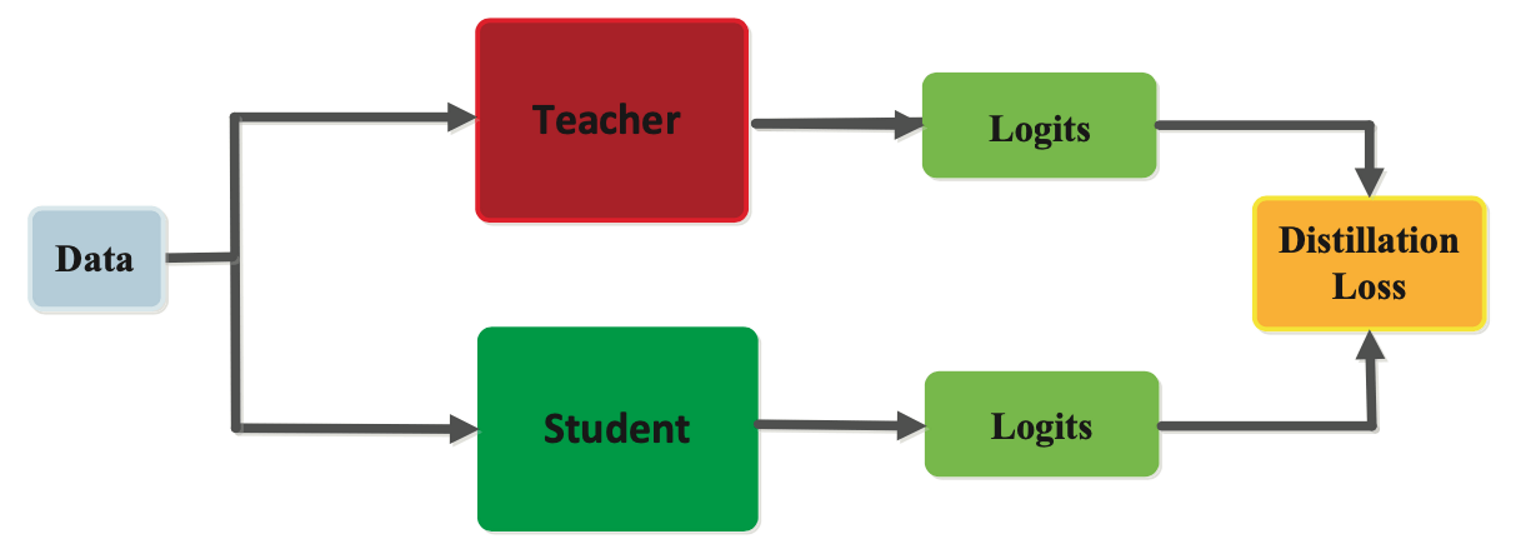
### Mimics the teacher's output probabilities or logits directly.
* Define a create_teacher_model function to create the teacher model.
* Define a response_based_kd function that implements Response-based Knowledge Distillation. This function takes the teacher model, student model, training data, and other parameters. It trains the student model using the teacher predictions as labels.
* Load your existing model.
* Define a final_model function to load data and create features as before.
* Train the teacher model using the training data.
* Create a student model using create_nn_model.
* Apply Response-based Knowledge Distillation using the response_based_kd function.
* Save the student model.

In [ ]:
# KD1

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import time
from tensorflow.keras.optimizers import SGD

Y_train_new = Y_train_new.astype(np.float32)

def create_nn_model(dim):
    n_model = keras.Sequential(
        [layers.Dense(dim, input_dim = dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid'),]
        )
    n_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                    metrics = tf.keras.metrics.BinaryAccuracy(threshold=0.5))
    return n_model

# Define your cls_predict function if not defined
def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return list(s_mean)

# Function to create the teacher model
def create_teacher_model(dim):
    teacher_model = keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid')
    ])
    teacher_model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['binary_accuracy'])
    return teacher_model

# Function for Response-based Knowledge Distillation
def response_based_kd(teacher_model, student_model, X_train, Y_train, X_test, Y_test,
                      epochs=50, batch_size=150, validation_split=0.1):
    teacher_model.trainable = False

    teacher_predictions = teacher_model.predict(X_train)
    student_labels = teacher_predictions  # Use teacher predictions as labels for student

    student_model.compile(loss='mean_squared_error',
                          optimizer=SGD(lr=0.01, momentum=0.9),
                          metrics=['binary_accuracy'])

    early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

    student_model.fit(X_train, student_labels,
                      validation_split=validation_split,
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping_monitor],
                      verbose=1)

    # Evaluate the student model
    loss, acc = student_model.evaluate(X_test, Y_test, verbose=2)
    print("Student model accuracy:", acc)

# Load your existing model
model_path = './CAFA_C/mf/D_CNN/ablation/'+str(embed_dim)+'_model_'+str(ff_dim)+'_'+str(nonOL)+'_'+str(6)+'_'+ SEG +'.h5'
model = keras.models.load_model(model_path)

# Create teacher model
teacher_model = create_teacher_model(Y_train_new[0].shape[0])
print("Train Teacher")
# Train teacher model
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
teacher_model.fit(X_train_new, Y_train_new,
                  epochs=50,
                  batch_size=150,
                  validation_split=0.1,
                  verbose=1,
                  callbacks=[early_stopping_monitor])

# Create student model
student_model = create_nn_model(Y_train_new[0].shape[0])
print("Train Student")
# Apply Response-based Knowledge Distillation
response_based_kd(teacher_model, student_model, X_train_new, Y_train_new, X_train_new, Y_train_new)

# Save the student model
student_model.save('student_model1.h5')

# Feature-based Knowledge Distillation
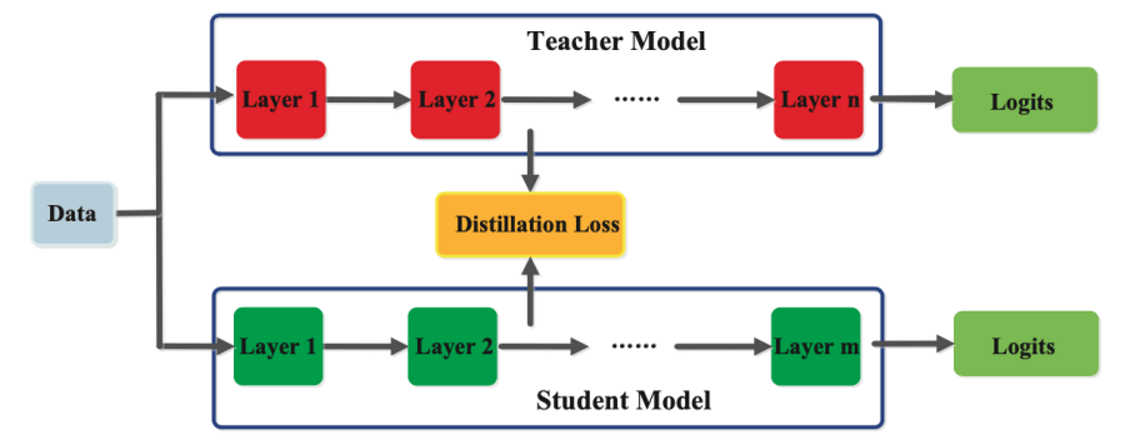
### Mimics the teacher's learned feature representations.
* Define a create_teacher_model function to create the teacher model.
* Define a custom loss function feature_based_loss that computes the loss based on both the classification loss and the distillation loss using teacher features.
* Define a create_student_model function to create the student model with the custom loss function.
* Load your existing model.
* Define a final_model function to load data and create features as before.
* Train the teacher model using the training data.
* Extract teacher features by predicting on the training data.
* Create a student model using create_student_model.
* Train the student model with the feature-based knowledge distillation loss.
* Save the student model.

In [ ]:
# KD2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import time

Y_train_new = Y_train_new.astype(np.float32)

# Define your cls_predict function if not defined
def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return list(s_mean)

# Function to create the teacher model
def create_teacher_model(dim):
    teacher_model = keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid')
    ])
    teacher_model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['binary_accuracy'])
    return teacher_model

# Function for custom feature-based loss
def feature_based_loss(y_true, y_pred):
    distillation_loss = tf.keras.losses.binary_crossentropy(teacher_features, y_pred)
    classification_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    total_loss = (1 - alpha) * classification_loss + alpha * distillation_loss
    return total_loss

# Function to create the student model
def create_student_model(dim, alpha):
    student_model = keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid')
    ])
    student_model.compile(loss=feature_based_loss,
                          optimizer='adam',
                          metrics=['binary_accuracy'])
    return student_model

# Load your existing model
model_path = './CAFA_C/cc/D_CNN/ablation/'+str(embed_dim)+'_model_'+str(ff_dim)+'_'+str(nonOL)+'_'+str(6)+'_'+ SEG +'.h5'
model = keras.models.load_model(model_path)

# Create teacher model
teacher_model = create_teacher_model(Y_train_new[0].shape[0])
print("Train Teacher")
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Train teacher model
teacher_model.fit(X_train_new, Y_train_new,
                  epochs=50,
                  batch_size=150,
                  validation_split=0.1,
                  verbose=1,
                  callbacks=[early_stopping_monitor])

# Extract teacher features
teacher_features = teacher_model.predict(X_train_new)

# Define alpha
alpha = 0.5

# Create student model
student_model = create_student_model(Y_train_new[0].shape[0], alpha)
print("Train Student")
# Train student model with feature-based knowledge distillation
student_model.fit(X_train_new, Y_train_new,
                   epochs=50,
                   batch_size=150,
                   validation_split=0.1,
                   verbose=1,
                  callbacks=[early_stopping_monitor])

# Save the student model
student_model.save('student_model2.h5')


# Relation-based Knowledge Distillation
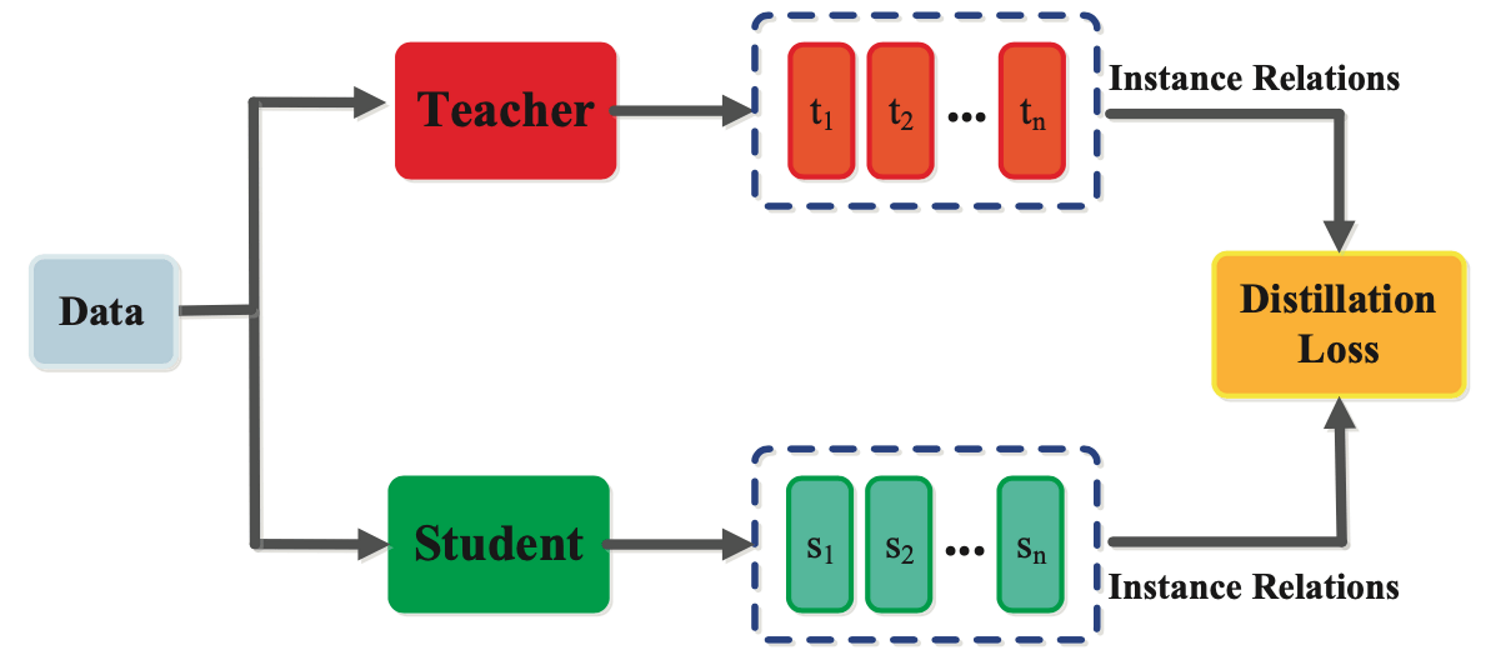
### Mimics the relationships or correlations between the teacher's predictions.
* Define a create_teacher_model function to create the teacher model.
* Define a custom relation_based_loss function that calculates the relation-based loss between predictions.
* Define a create_student_model function to create the student model with the relation-based loss function.
* Load your existing model.
* Define a final_model function to load data and create features as before.
* Train the teacher model using the training data.
* Create a student model using create_student_model.
* Train the student model with the relation-based knowledge distillation loss.
* We save the student model.

In [ ]:
# KD3

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import time

Y_train_new = Y_train_new.astype(np.float32)

# Define your cls_predict function if not defined
def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return list(s_mean)

# Function to create the teacher model
def create_teacher_model(dim):
    teacher_model = keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid')
    ])
    teacher_model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['binary_accuracy'])
    return teacher_model

# Function for relation-based loss
def relation_based_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # tf.einsum stands for Einstein summation, a mathematical notation that generalizes summation operations on tensors. 
    # It allows you to specify which dimensions of input tensors should be multiplied and summed to produce the output tensor.
    # Compute outer product of predictions   c_111 = a_11 * b_11 , c_112 = a_11 * b_12 --> element-wise multiplication
    pred_outer = tf.einsum('ij,ik->ijk', y_pred, y_pred)
    
    # Compute outer product of ground truth labels
    true_outer = tf.einsum('ij,ik->ijk', y_true, y_true)
    
    # Calculate Frobenius norm of the difference
    # The Frobenius norm is a widely used measure of the magnitude of a matrix.
    # Using the Frobenius norm helps in quantifying the difference or distance between the relationships of predictions made by the teacher model and the student model. 
    loss = tf.reduce_sum(tf.square(pred_outer - true_outer))
    
    return loss

# Function to create the student model
def create_student_model(dim):
    student_model = keras.Sequential([
        layers.Dense(dim, input_dim=dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid')
    ])
    student_model.compile(loss=relation_based_loss,
                          optimizer='adam',
                          metrics=['binary_accuracy'])
    return student_model

# Load your existing model
model_path = './CAFA_C/mf/D_CNN/ablation/'+str(embed_dim)+'_model_'+str(ff_dim)+'_'+str(nonOL)+'_'+str(6)+'_'+ SEG +'.h5'
model = keras.models.load_model(model_path)
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# Create teacher model
teacher_model = create_teacher_model(Y_train_new[0].shape[0])
print("Train Teacher")
# Train teacher model
teacher_model.fit(X_train_new, Y_train_new,
                  epochs=50,
                  batch_size=150,
                  validation_split=0.1,
                  verbose=1,
                  callbacks=[early_stopping_monitor])

# Create student model
student_model = create_student_model(Y_train_new[0].shape[0])
print("Train Student")
# Train student model with relation-based knowledge distillation
student_model.fit(X_train_new, Y_train_new,
                   epochs=50,
                   batch_size=150,
                   validation_split=0.1,
                   verbose=1,
                  callbacks=[early_stopping_monitor])

# Save the student model
student_model.save('student_model3.h5')

# Original

In [ ]:
# Eredeti futtatókód

from keras.models import load_model
from tqdm import tqdm
from IPython.display import clear_output
import time

def cls_predict(pred, normalize=True, sample_weight=None):
    s_mean = np.mean(pred, axis=0)
    m = max(s_mean)
    s_mean = (s_mean/m)
    return(list(s_mean))

def final_model(filename):
    print('Extracting features based on GRU model...... ')
    dataframe2 = pd.read_csv(filename, header=None)
    dataset2 = dataframe2.values
    overlap = 50
    X_test = dataset2[:, 0]
    Y_test = dataset2[:, 1:len(dataset2[0])]
    c_p = []

    total_elements = len(X_test)

    for tag, row in enumerate(X_test):
        remaining_elements = total_elements - tag
        print(f"Remaining elements: {remaining_elements}")

        pos = math.ceil(len(row) / overlap)
        if pos < math.ceil(segmentSize / overlap):
            pos = math.ceil(segmentSize / overlap)
        segment = []
        for itr in range(pos - math.ceil(segmentSize / overlap) + 1):
            init = itr * overlap
            segment.append(row[init: init + segmentSize])
        seg_nGram = nGram(segment, chunkSize, dict_Prop)
        test_seg = sequence.pad_sequences(seg_nGram, maxlen=max_seq_len)
        preds = model.predict(test_seg)
        c_p.append(cls_predict(preds))

    c_p = np.array(c_p)
    return c_p, Y_test

def create_nn_model(dim):
    n_model = keras.Sequential(
        [layers.Dense(dim, input_dim = dim, kernel_initializer='normal', activation='relu'),
        layers.Dense(dim, kernel_initializer='normal', activation='sigmoid'),]
        )
    n_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                    metrics = tf.keras.metrics.BinaryAccuracy(threshold=0.5))
    return n_model

# Creates a HDF5 file 'my_model.h5'

model_path = './CAFA_C/mf/D_CNN/ablation/'+str(embed_dim)+'_model_'+str(ff_dim)+'_'+str(nonOL)+'_'+str(6)+'_'+ SEG +'.h5'
model.save(model_path)
#del model  
#model = load_model(model_path)

# Training
#X_train_new, Y_train_new = final_model('./CAFA5/cc/train_data_cc2.csv')

# Training model 2
model1 = create_nn_model(Y_train_new[0].shape[0])
print(model1.summary())
early_stopping_monitor = EarlyStopping(monitor='val_loss', verbose=1)

# Use tqdm in the fit function for the progress bar
model1.fit(X_train_new, Y_train_new.astype(None),
           callbacks=[early_stopping_monitor],
           validation_split=0.1,
           epochs=50,
           batch_size=150,
           verbose=0)

Tesztelés futtatása

In [ ]:
from matplotlib import pyplot as plt

# Testing
def test_fun(file):
    X_test_new, Y_test_new = final_model(file)
    print(X_test_new.shape, Y_test_new.shape)
    Y_test_new = np.array(Y_test_new).astype(None)

    fmax, tmax = 0.0, 0.0
    precisions, recalls = [], []
    for t in range(1, 101, 1):
        test_preds = model1.predict(X_test_new)

        threshold = t / 100.0
        print("THRESHOLD IS =====> ", threshold)
        test_preds[test_preds>=threshold] = int(1)
        test_preds[test_preds<threshold] = int(0)

        rec = recall(Y_test_new, test_preds)
        pre = precision(Y_test_new, test_preds)
        recalls.append(rec)
        precisions.append(pre)

        f1 = f_score(Y_test_new, test_preds)*100
        f = 2 * pre * rec / (pre + rec)
        if math.isnan(f):
          f = 0.0
        print('Recall: {0}'.format(rec*100), '     Precision: {0}'.format(pre*100),
              '     F1-score1: {0}'.format(f*100), '      F1-score2: {0}'.format(f1))

        if fmax < f:
            fmax = f
            tmax = threshold

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    sorted_index = np.argsort(recalls)
    recalls = recalls[sorted_index]
    precisions = precisions[sorted_index]
    aupr = np.trapz(precisions, recalls)
    print(f'AUPR: {aupr:0.3f}')

    plt.figure()
    plt.plot(recalls, precisions, color='darkorange', lw=2, label=f'AUPR curve (area = {aupr:0.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Area Under the Precision-Recall curve')
    plt.legend(loc="upper right")
    plt.savefig(f'aupr.pdf')

    return tmax

th_set = test_fun("./CAFA5/mf/test_data_mf2.csv")

In [ ]:
def test_fun(file):
    X_test_new, Y_test_new = final_model(file)
    print(X_test_new.shape, Y_test_new.shape)
    test_preds = model1.predict(X_test_new)
    Y_test_new = np.array(Y_test_new).astype(None)
    test_preds[test_preds>=th_set] = int(1)
    test_preds[test_preds<th_set] = int(0)
    rec = recall(Y_test_new, test_preds)*100
    pre = precision(Y_test_new, test_preds)*100
    f = 2 * pre * rec / (pre + rec)
    f1 = f_score(Y_test_new, test_preds)*100
    print('   Recall: {0}'.format(rec),  '    Precision: {0}'.format(pre),  '    F1-score: {0}'.format(f), '    F1-score: {0}'.format(f1))

print("Best Threshold: ", th_set)
test_fun('./CAFA5/mf/testData_mf1000.csv')
# test_fun("testData_mf200.csv")
# test_fun("testData_mf500.csv")
# test_fun("testData_mf1000.csv")
# test_fun("testData_mf16000.csv")

print('/n')
print("code Completion date is :", datetime.datetime.now())